# Visualization of Videogame reviews from Metacritic website 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mlt

In [2]:
%matplotlib inline

In [14]:
df = pd.read_csv("bs4_metacritic.csv")
df.head()

,Unnamed: 0,score,name,platform,date
0,0,99,The Legend of Zelda: Ocarina of Time,Nintendo 64,1998-11-23
1,1,98,Tony Hawk's Pro Skater 2,PlayStation,2000-09-20
2,2,98,Grand Theft Auto IV,PlayStation 3,2008-04-29
3,3,98,SoulCalibur,Dreamcast,1999-09-08
4,4,98,Grand Theft Auto IV,Xbox 360,2008-04-29


We unfortunately have an unnamed row which has the exact same values as the indexes. We shall remove it from our dataframe 

In [16]:
df = df.loc[:, "score":"date"]
df.head()

,score,name,platform,date
0,99,The Legend of Zelda: Ocarina of Time,Nintendo 64,1998-11-23
1,98,Tony Hawk's Pro Skater 2,PlayStation,2000-09-20
2,98,Grand Theft Auto IV,PlayStation 3,2008-04-29
3,98,SoulCalibur,Dreamcast,1999-09-08
4,98,Grand Theft Auto IV,Xbox 360,2008-04-29


Let us look at the summary of our dataframe now

In [17]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9900 entries, 0 to 9899
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   score     9900 non-null   int64 
 1   name      9900 non-null   object
 2   platform  9900 non-null   object
 3   date      9900 non-null   object
dtypes: int64(1), object(3)
memory usage: 309.5+ KB
None
            score
count  9900.00000
mean     79.25202
std       5.67287
min      71.00000
25%      75.00000
50%      79.00000
75%      83.00000
max      99.00000


We will convert the "date" column data into datetime object. The format is obtained from the [python docs](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes).

In [19]:
df["date"] = pd.to_datetime( df["date"], format="%Y-%m-%d")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9900 entries, 0 to 9899
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   score     9900 non-null   int64         
 1   name      9900 non-null   object        
 2   platform  9900 non-null   object        
 3   date      9900 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 309.5+ KB
None


We will first visualise based on the number of games released and average score for each platform

In [22]:
df["platform"].unique()

array(['Nintendo 64', 'PlayStation', 'PlayStation 3', 'Dreamcast',
       'Xbox 360', 'Wii', 'Xbox One', 'Switch', 'PlayStation 2',
       'PlayStation 4', 'GameCube', 'Xbox', 'PC', 'Wii U',
       'Game Boy Advance', '3DS', 'DS', 'PlayStation Vita',
       'PlayStation 5', 'PSP', 'Xbox Series X', 'Stadia'], dtype=object)

In [24]:
df["platform"].value_counts()

PC                  2750
PlayStation 4       1123
Xbox 360             831
Switch               727
Xbox One             704
PlayStation 3        692
PlayStation 2        663
Xbox                 426
DS                   289
Wii                  258
GameCube             236
PSP                  234
Game Boy Advance     215
3DS                  206
PlayStation Vita     141
Wii U                119
PlayStation          115
Dreamcast             76
Nintendo 64           58
PlayStation 5         20
Xbox Series X         14
Stadia                 3
Name: platform, dtype: int64

<AxesSubplot:title={'center':'Number of games per platform'}>

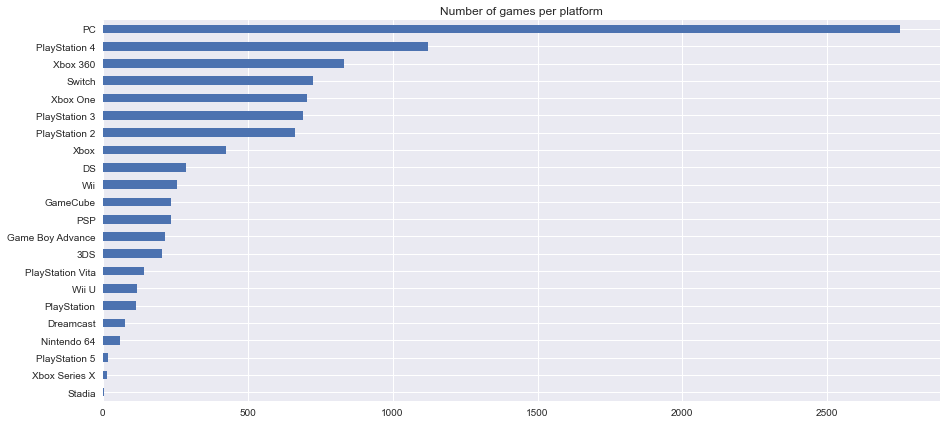

In [34]:
mlt.style.use("seaborn")
df["platform"].value_counts(ascending=True).plot.barh(figsize=(15,7), title="Number of games per platform")

In [38]:
plat_group = df.groupby(["platform"])
plat_group["score"].mean()

platform
3DS                 78.868932
DS                  78.089965
Dreamcast           82.315789
Game Boy Advance    79.144186
GameCube            80.495763
Nintendo 64         83.603448
PC                  79.142909
PSP                 78.004274
PlayStation         83.252174
PlayStation 2       79.659125
PlayStation 3       80.140173
PlayStation 4       78.336598
PlayStation 5       80.450000
PlayStation Vita    78.609929
Stadia              78.000000
Switch              78.536451
Wii                 78.782946
Wii U               80.252101
Xbox                79.964789
Xbox 360            79.831528
Xbox One            78.849432
Xbox Series X       81.071429
Name: score, dtype: float64

As the values are very close to each other, all in the range of 75 to 85, we shall specify X-limits when plotting

<AxesSubplot:title={'center':'Average score per platform'}, ylabel='platform'>

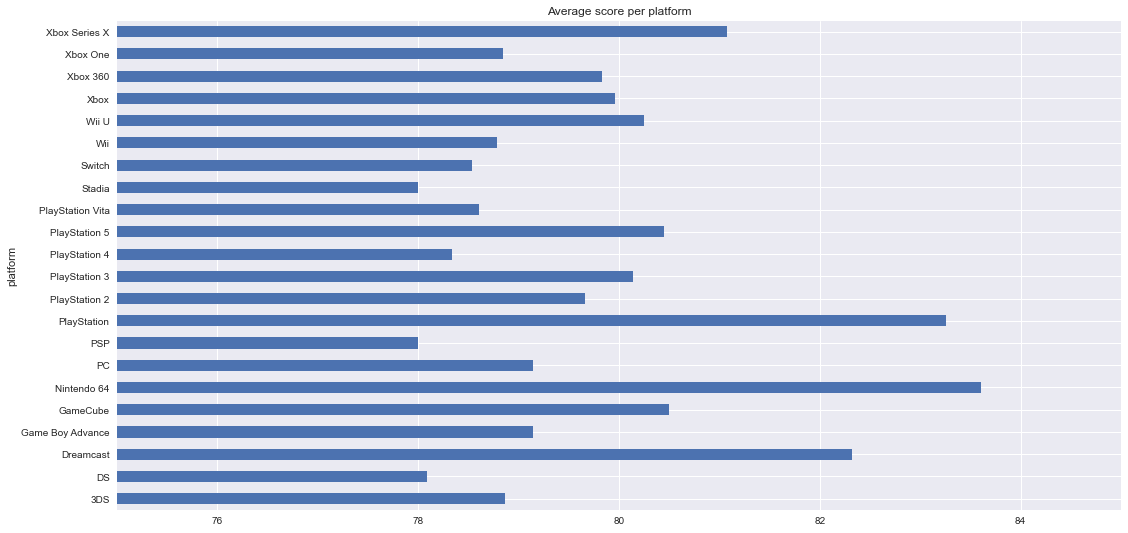

In [42]:
plat_group["score"].mean().plot.barh(figsize=(18,9), title="Average score per platform", xlim=(75,85))

We can clearly see that the older generation consoles i.e N64, Dreamcast and PlayStation lead the charts. However, they lie in the bottom in the "number of games per console" graph.

## Important disclaimer:
The data obtained is only for the first 100 out of 181 pages in the Metacritic reviews. The data vusalization is not an accurate representation of the average scores of the number of games released for any of these platforms. This project is only for personal practise